#### To make use of the objects/functions in pandas module, lets first  import the module with an import statement

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#### Series
A series is like a numpy array with actual data label, and the data labels allow you to index
For example the following code generates a series of 5 random numbers along with an index that we specify

In [2]:
# Create a series, Preserve the series in variable s for later access
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [3]:
print(s)

a    0.455564
b   -0.723852
c    0.391055
d    1.706320
e   -0.092104
dtype: float64


In [4]:
print(s['a'])
print(s[0])

0.4555644308707208
0.4555644308707208


In [5]:
print(s[:3])

a    0.455564
b   -0.723852
c    0.391055
dtype: float64


In [6]:
print(s[s>0])

a    0.455564
c    0.391055
d    1.706320
dtype: float64


In [7]:
print(s.values)

[ 0.45556443 -0.72385151  0.39105518  1.70632049 -0.09210418]


In [8]:
print(s.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


#### DataFrame

In [9]:
# Create a dataframe
xls = pd.ExcelFile('pandas data/sample.xlsx')
df1 = xls.parse('Sheet1')
df1

,sample1,sample2,sample3
0,5,4,33
1,8,5,66
2,9,9,77


In [10]:
df1.columns

Index(['sample1', 'sample2', 'sample3'], dtype='object')

In [11]:
DataFrame(df1,columns=['sample1','sample2'])

,sample1,sample2
0,5,4
1,8,5
2,9,9


In [12]:
df1.head()

,sample1,sample2,sample3
0,5,4,33
1,8,5,66
2,9,9,77


In [13]:
df1.tail()

,sample1,sample2,sample3
0,5,4,33
1,8,5,66
2,9,9,77


In [14]:
df1.head(2)

,sample1,sample2,sample3
0,5,4,33
1,8,5,66


In [15]:
df1.tail(2)

,sample1,sample2,sample3
1,8,5,66
2,9,9,77


In [16]:
df1['sample1']=5

In [17]:
df1

,sample1,sample2,sample3
0,5,4,33
1,5,5,66
2,5,9,77


In [18]:
sample1 = Series (['Emma','John','George'],index=(0,1,2))

In [19]:
sample1

0      Emma
1      John
2    George
dtype: object

In [20]:
df1['sample1']=sample1

In [21]:
df1

,sample1,sample2,sample3
0,Emma,4,33
1,John,5,66
2,George,9,77


### Read CSV and XLSX Files

In [22]:
import numpy as np
import pandas as pd

In [23]:
xls = pd.ExcelFile('pandas data/sample.xlsx')
df1 = xls.parse('Sheet1')
df1

,sample1,sample2,sample3
0,5,4,33
1,8,5,66
2,9,9,77


In [24]:
data = pd.read_csv('pandas data/sample1.csv')

In [25]:
data

,sample1,sample2,sample3
0,5,4,33
1,8,5,66
2,9,9,77


### Combining DataFrames

In [26]:
import numpy as np
import pandas as pd

In [27]:
nan=np.nan
df1=pd.DataFrame ({
                    'Category' : (['Electronics', "Men's Clothing", "Women's Clothing"]), 
                    'Sales': np.array([nan,3,5])
                  })

In [28]:
df1

,Category,Sales
0,Electronics,NaN
1,Men's Clothing,3.0
2,Women's Clothing,5.0


In [29]:
df2=pd.DataFrame ({
                    'Category' : (['Electronics', "Men's Clothing", "Women's Clothing"]), 
                    'Sales': [2,4,5]
                  })

In [30]:
df2

,Category,Sales
0,Electronics,2
1,Men's Clothing,4
2,Women's Clothing,5


In [31]:
df1.combine_first(df2) 
# keeps value of df1 if the value exists. if it is nan, then it picks value from df2
# if df1 and df2 values different, then df1 value is given preference

,Category,Sales
0,Electronics,2.0
1,Men's Clothing,3.0
2,Women's Clothing,5.0


### Handling Missing Values

In [32]:
import numpy as np, pandas as pd
nan=np.nan

In [33]:
df=pd.DataFrame ({ 'Category' : (['Electronics', "Men's Clothing", "Women's Clothing"]), 
                    'Sales': np.array([nan,3,5]),
                    'Date' : pd.Timestamp('20161106'), 
                    '# of Customers' : [nan,nan,nan]                       
                  })

In [34]:
df

,Category,Sales,Date,# of Customers
0,Electronics,NaN,2016-11-06,NaN
1,Men's Clothing,3.0,2016-11-06,NaN
2,Women's Clothing,5.0,2016-11-06,NaN


Lets see the code for dropping a row or a column with missing value
- axis 0 (by default) for row and 1 for column
- how can be any (by default) or all - any means it drops a row/column if any value is missing, all means it drops a row/column only if all values are missing
- thresh=2 means that the row/column needs to have atleast 2 values, and if it doesnt have 2 values then we drop it

In [35]:
df.dropna(axis=1 , how='any')

,Category,Date
0,Electronics,2016-11-06
1,Men's Clothing,2016-11-06
2,Women's Clothing,2016-11-06


In [36]:
df.dropna(axis=1 , how='all')

,Category,Sales,Date
0,Electronics,NaN,2016-11-06
1,Men's Clothing,3.0,2016-11-06
2,Women's Clothing,5.0,2016-11-06


In [37]:
df.dropna(axis=1 , thresh=2)

,Category,Sales,Date
0,Electronics,NaN,2016-11-06
1,Men's Clothing,3.0,2016-11-06
2,Women's Clothing,5.0,2016-11-06


In [38]:
df.dropna(axis=0 , thresh=3)

,Category,Sales,Date,# of Customers
1,Men's Clothing,3.0,2016-11-06,NaN
2,Women's Clothing,5.0,2016-11-06,NaN


Note: There are other strategies for handling missing values such as replacing it with mean or mode of all values, which we do not talk about in this training

### Merging / Joining
we will learn to do 
- left outer join
- right outer join
- full outer join
- inner join

In [39]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
nan=np.nan

In [40]:
df1=DataFrame ({ 'Category' : (['Electronics', "Men's Clothing", "Women's Clothing"]), 
                    'Sales': np.array([1,4,5]),
                  })
df1

,Category,Sales
0,Electronics,1
1,Men's Clothing,4
2,Women's Clothing,5


In [41]:
df2=DataFrame ({ 'Category' : (["Electronics", "Men's Clothing", "Women's Clothing"]), 
                    'Sales': np.array([1,6,6]),
                  })
df2

,Category,Sales
0,Electronics,1
1,Men's Clothing,6
2,Women's Clothing,6


In [42]:
df3=DataFrame ({ 'Category' : (["Kid's Clothing", "Men's Clothing", "Women's Clothing"]), 
                    'Sales': np.array([2,7,7]),
                  })
df3

,Category,Sales
0,Kid's Clothing,2
1,Men's Clothing,7
2,Women's Clothing,7


##### left outer join
- if the Category is missing in the table on the right, then Sales value gets replaced by nan 

In [43]:
pd.merge(df1, df2, on='Category', how='left')

,Category,Sales_x,Sales_y
0,Electronics,1,1
1,Men's Clothing,4,6
2,Women's Clothing,5,6


In [44]:
pd.merge(df1, df3, on='Category', how='left')

,Category,Sales_x,Sales_y
0,Electronics,1,NaN
1,Men's Clothing,4,7.0
2,Women's Clothing,5,7.0


##### right outer join

In [45]:
pd.merge(df1, df3, on='Category', how='right')

,Category,Sales_x,Sales_y
0,Men's Clothing,4.0,7
1,Women's Clothing,5.0,7
2,Kid's Clothing,NaN,2


##### full outer join

In [46]:
pd.merge(df1, df3, on='Category', how='outer')

,Category,Sales_x,Sales_y
0,Electronics,1.0,NaN
1,Men's Clothing,4.0,7.0
2,Women's Clothing,5.0,7.0
3,Kid's Clothing,NaN,2.0


##### inner join

In [47]:
pd.merge(df1, df3, on='Category', how='inner')

,Category,Sales_x,Sales_y
0,Men's Clothing,4,7
1,Women's Clothing,5,7


##### If the columns are named differently then you can still join on them based using the following:
- for example in the left_df4, the column name is "Categories" and not "Category"

In [48]:
df4=DataFrame ({ 'Categories' : (['Electronics', "Men's Clothing", "Women's Clothing"]), 
                    'Sales': np.array([1,7,2])
                  })
df4

,Categories,Sales
0,Electronics,1
1,Men's Clothing,7
2,Women's Clothing,2


In [51]:
df5 = pd.merge(df1, df4, left_on='Category' , right_on = 'Categories', how='left')
df5

,Category,Sales_x,Categories,Sales_y
0,Electronics,1,Electronics,1
1,Men's Clothing,4,Men's Clothing,7
2,Women's Clothing,5,Women's Clothing,2


In [52]:
df5.drop(columns='Categories')

,Category,Sales_x,Sales_y
0,Electronics,1,1
1,Men's Clothing,4,7
2,Women's Clothing,5,2


#### Replace method

In [53]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
nan=np.nan

In [54]:
df = DataFrame ({ 'one' : pd.Series([3,2,6,4,8], index=['a', 'b', 'c', 'd', 'e']), 
                    'two': pd.Series([7,3,9,5,6], index=['a', 'b', 'c', 'd', 'e'])
                  })
df

,one,two
a,3,7
b,2,3
c,6,9
d,4,5
e,8,6


In [55]:
df1 = DataFrame ({ 'one' : pd.Series([3,2,6,4,8], index=['a', 'b', 'c', 'd', 'e']), 
                    'two': pd.Series([7,3,9,5,6], index=['f', 'g', 'h', 'i', 'j'])
                  })
df1 # Notice the difference between df and df1 , because index are different

,one,two
a,3.0,NaN
b,2.0,NaN
c,6.0,NaN
d,4.0,NaN
e,8.0,NaN
f,NaN,7.0
g,NaN,3.0
h,NaN,9.0
i,NaN,5.0
j,NaN,6.0


In [56]:
df1.replace(6,60)

,one,two
a,3.0,NaN
b,2.0,NaN
c,60.0,NaN
d,4.0,NaN
e,8.0,NaN
f,NaN,7.0
g,NaN,3.0
h,NaN,9.0
i,NaN,5.0
j,NaN,60.0


In [57]:
df1.replace((7,8,nan),(70,80,0))

,one,two
a,3.0,0.0
b,2.0,0.0
c,6.0,0.0
d,4.0,0.0
e,80.0,0.0
f,0.0,70.0
g,0.0,3.0
h,0.0,9.0
i,0.0,5.0
j,0.0,6.0


In [58]:
df1.replace({5:500}) # we can pass a dict instead of values

,one,two
a,3.0,NaN
b,2.0,NaN
c,6.0,NaN
d,4.0,NaN
e,8.0,NaN
f,NaN,7.0
g,NaN,3.0
h,NaN,9.0
i,NaN,500.0
j,NaN,6.0


#### Creating new columns - map method

In [59]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
nan=np.nan

In [60]:
df=pd.DataFrame ({ 'Category' : (['Electronics', "Men's Clothing", "Women's Clothing"]), 
                    'Sales': [20,30,40]  
                  })
df

,Category,Sales
0,Electronics,20
1,Men's Clothing,30
2,Women's Clothing,40


In [61]:
num_of_cust = {'Electronics': 2, "Men's Clothing": 3, "Women's Clothing": 4}
num_of_cust

{'Electronics': 2, "Men's Clothing": 3, "Women's Clothing": 4}

In [62]:
df['# of customers']=df['Category'].map(num_of_cust)
df

,Category,Sales,# of customers
0,Electronics,20,2
1,Men's Clothing,30,3
2,Women's Clothing,40,4


#### Ordering columns
- manually deciding the order in which columns appear in the table

In [63]:
df=df[['Category','# of customers','Sales']]
df

,Category,# of customers,Sales
0,Electronics,2,20
1,Men's Clothing,3,30
2,Women's Clothing,4,40


#### Dropping columns/rows

In [64]:
df=df.drop('Sales',axis=1) # 0 for rows and 1 for columns
df

,Category,# of customers
0,Electronics,2
1,Men's Clothing,3
2,Women's Clothing,4


In [65]:
df=df.drop(1,axis=0)

In [66]:
df

,Category,# of customers
0,Electronics,2
2,Women's Clothing,4


#### Summary statistics

In [67]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
nan=np.nan

In [68]:
df=pd.read_csv('pandas data/bank.csv',sep=';') # delimiter=';'

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [70]:
df.head(3) # by default it shows the first 5 rows, so if we dont write anything it shows 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [71]:
df['duration'].mean() # avg time spent talking to the client

263.96129174961294

In [72]:
group_object = df.groupby('education')

In [73]:
group_object.describe()  

age                                                     balance  \
            count       mean        std   min   25%   50%   75%   max   count   
education                                                                       
primary     678.0  46.833333  11.200085  19.0  39.0  46.0  55.0  87.0   678.0   
secondary  2306.0  40.062446  10.226439  19.0  32.0  38.0  47.0  86.0  2306.0   
tertiary   1350.0  39.645926   9.612536  22.0  32.0  37.0  46.0  78.0  1350.0   
unknown     187.0  45.299465  11.373718  19.0  37.0  47.0  54.0  79.0   187.0   

                        ...  pdays        previous                           \
                  mean  ...    75%    max    count      mean       std  min   
education               ...                                                   
primary    1411.544248  ...   -1.0  461.0    678.0  0.460177  1.857726  0.0   
secondary  1196.814397  ...   -1.0  808.0   2306.0  0.528621  1.599432  0.0   
tertiary   1775.423704  ...   -1.0  871.0   1350.0  0.612593  1.787525  0.0   
unknown    1701.245989  ...   -1.0  683.0    187.0  0.508021  1.482402  0.0   

                                
           25%  50%  75%   max  
education                       
primary    0.0  0.0  0.0  24.0  
secondary  0.0  0.0  0.0  25.0  
tertiary   0.0  0.0  0.0  22.0  
unknown    0.0  0.0  0.0  13.0  

[4 rows x 56 columns]

#### Intro to time series classes

In [74]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
nan=np.nan

In [75]:
# a single timestamp
pd.Timestamp('2018-03-31')

Timestamp('2018-03-31 00:00:00')

In [76]:
# a list of timestamps
lst = [pd.Timestamp('2018-03-31'),pd.Timestamp('2018-04-30'),pd.Timestamp('2018-05-31')]
lst

[Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-30 00:00:00'),
 Timestamp('2018-05-31 00:00:00')]

In [77]:
ts = pd.Series(np.random.rand(3),lst)
ts

2018-03-31    0.885020
2018-04-30    0.803063
2018-05-31    0.361009
dtype: float64

In [78]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [79]:
index = pd.date_range('2017-01-01', '2018-01-01', freq='M') # frequency can be yearly, monthly, daily, hourly etc. 
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

##### Converting to timestamps

In [80]:
# lets create a series of dates
tss = Series(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30'])
tss

0    2017-01-31
1    2017-02-28
2    2017-03-31
3    2017-04-30
dtype: object

In [81]:
# lets convert it to a series of timestamps
pd.to_datetime(tss)

0   2017-01-31
1   2017-02-28
2   2017-03-31
3   2017-04-30
dtype: datetime64[ns]

In [82]:
df=pd.read_csv('pandas data/stocks.csv')

In [83]:
df

,Date,Open,High,Low
0,01/20/2016,26.55,26.96,26.33
1,01/21/2016,26.82,27.47,26.76
2,01/22/2016,27.38,27.73,27.29
3,01/23/2016,27.53,28.19,27.53
4,01/24/2016,28.05,28.10,27.72


In [84]:
df=pd.read_csv('pandas data/stocks.csv',parse_dates=['Date']) # this time it reads date as a date

In [85]:
df

,Date,Open,High,Low
0,2016-01-20,26.55,26.96,26.33
1,2016-01-21,26.82,27.47,26.76
2,2016-01-22,27.38,27.73,27.29
3,2016-01-23,27.53,28.19,27.53
4,2016-01-24,28.05,28.10,27.72


In [86]:
# lets see if we can make date column our index
df=pd.read_csv('pandas data/stocks.csv',parse_dates=['Date'], index_col='Date') 

In [87]:
df

,Open,High,Low
Date,,,
2016-01-20,26.55,26.96,26.33
2016-01-21,26.82,27.47,26.76
2016-01-22,27.38,27.73,27.29
2016-01-23,27.53,28.19,27.53
2016-01-24,28.05,28.10,27.72


#### Basic charts

In [88]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
nan=np.nan

In [89]:
df=pd.read_csv('pandas data/bank.csv',sep=';') # delimiter=';'

In [90]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [91]:
df1=df.head(50)

In [92]:
import matplotlib 

In [93]:
df1.plot.scatter(x='age' , y='balance')

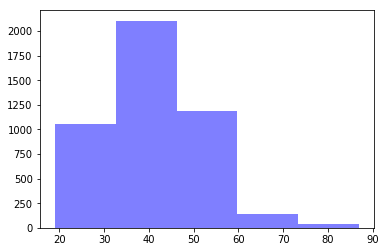

In [94]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
x = df['age']
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

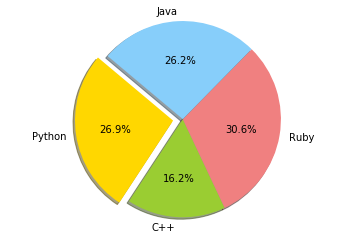

In [95]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

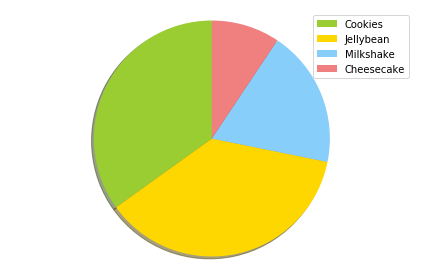

In [96]:
import matplotlib.pyplot as plt
 
labels = ['Cookies', 'Jellybean', 'Milkshake', 'Cheesecake']
sizes = [38.4, 40.6, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

## Thank you!